In [1]:
%load_ext autoreload
%autoreload 2

In [51]:
cd ../ttools

/home/zehuany/cosegmentor/ttools


In [52]:
run _init_paths.py

In [53]:
from fast_rcnn.train import get_training_roidb, train_net
from fast_rcnn.config import cfg, cfg_from_file, cfg_from_list, get_output_dir
from datasets.factory import get_imdb
import datasets.imdb
import caffe
import argparse
import pprint
import numpy as np
import sys
from shapely.geometry import Polygon, MultiPolygon
from pycocotools import mask 
import matplotlib.pyplot as plt
import PIL
import cv2
import skimage.io as sio
import roi_data_layer.roidb as mroi
import scipy.ndimage as simage

In [54]:
#gt=imdb.gt_roidb()
#print '%0.2f'% gt[1]['seg_areas'][20]iiiiii
#roidb=imdb.roidb
imdb=get_imdb('coco_2014_train')

loading annotations into memory...
Done (t=31.05s)
creating index...
index created!
train


In [55]:
roidb = get_training_roidb(imdb)
#imdb.append_flipped_images()
#names=[imdb.image_path_at(i) for i in xrange(len(imdb.image_index))]


Appending horizontally-flipped training examples...
coco_2014_train MCG roidb loaded from /home/zehuany/cosegmentor/data/cache/coco_2014_train_MCG_top2000_roidbt.pkl
done
Preparing training data...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
done


In [56]:
len(roidb)
#roidb[i]['image']
#overlaps[inds]
#names.index('/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000167126.jpg')

98

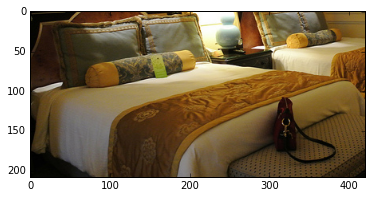

In [59]:
i=0
j=0
im =sio.imread(roidb[i]['image'])
box=roidb[i]['boxes'][j]
sim=im[box[1]:box[3]+1,box[0]:box[2]+1,:]
plt.imshow(sim)
plt.show()

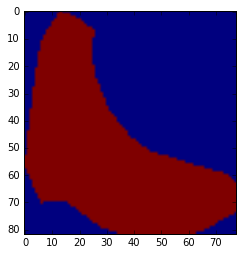

dtype('float32')

In [13]:
d=mask.decode(roidb[i]['segmentation'][j]).astype('float32')
plt.imshow(d.squeeze())
plt.show()
d.dtype

In [249]:
overlaps=roidb[i]['max_overlaps']
inds=np.where(overlaps>=cfg.TRAIN.FG_THRESH)[0]
sbox=roidb[i]['boxes'][inds]
sbox

array([[366,   0, 394,  65],
       [616,  19, 634,  87],
       [283,   3, 308,  62],
       [196,   4, 220,  57],
       [399,  14, 418,  64],
       [317,   5, 337,  63],
       [231,   8, 251,  59],
       [574,  32, 592,  81],
       [598,  13, 619,  82],
       [387, 227, 451, 380],
       [449, 218, 495, 357],
       [177,  10, 193,  58],
       [593,  37, 607,  82],
       [424,   2, 443,  70],
       [218, 194, 306, 351],
       [289, 141, 397, 251],
       [613,  26, 613,  30],
       [432,   9, 434,  22],
       [569,  27, 584,  80],
       [450, 221, 491, 352],
       [453, 221, 491, 352],
       [389, 228, 450, 360],
       [389, 218, 458, 374],
       [394, 228, 450, 360],
       [389, 218, 458, 360],
       [389, 228, 450, 345],
       [453, 234, 491, 352],
       [389, 228, 450, 374],
       [389, 228, 455, 346]], dtype=uint16)

In [14]:
m= simage.interpolation.zoom(input=d, zoom=(30./d.shape[0],30./d.shape[1],d.shape[2]), order = 2)
m.dtype
names

/home/zehuany/.local/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:571: RuntimeWarning: invalid value encountered in true_divide
  zoom = (numpy.array(input.shape) - 1) / zoom_div


NameError: name 'names' is not defined

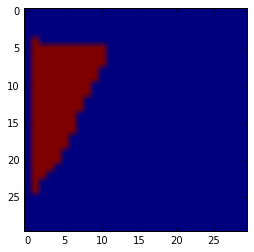

(30, 30, 1)

In [154]:
plt.imshow(m.squeeze())
plt.show()
m.shape

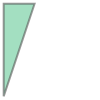

In [46]:
Polygon([(240,127.7638011695907), (240,133), (241.7462506094588,133), (240,127.7638011695907),(240,127.7638011695907)])

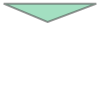

In [47]:
Polygon([(248.7420532319392,133), (249.0965189873417,133), (248.91,132.93), (248.7420532319392,133)])

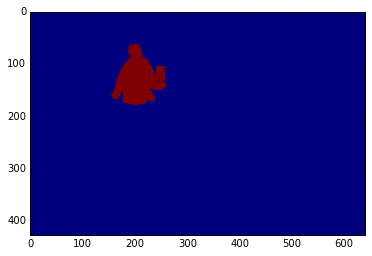

In [38]:
prle = mask.frPyObjects([[157.91,157.13, 166.33,128.72, 174.22,108.73, 184.74,94.01000000000001, 191.58 ,88.75, 186.84 ,79.28, 188.42 ,65.08, 199.99 ,61.92, 207.36, 62.97, 211.56 ,74.02, 214.19 ,86.64, 224.71 ,93.48, 235.76 ,115.05, 242.6, 135.56, 248.91, 132.93, 257.33, 136.09, 259.96, 144.5, 250.49, 150.29, 239.44 ,149.76, 227.87, 149.24, 237.86 ,162.39, 237.86 ,170.8, 223.14, 171.33, 218.4 ,177.64, 207.88, 177.64, 202.62, 179.74, 177.37, 174.48, 176.85, 151.34, 172.64, 159.23, 167.91, 167.65, 158.96, 167.65, 153.18, 157.13, 157.91, 157.13]],427,640)
grle = mask.frPyObjects([[240, 105, 240, 133, 257, 133, 257, 105, 240 ,105]],427,640)
a=mask.merge([prle[0],grle[0]])
d=mask.decode([a])
plt.imshow(mask.decode([a]).squeeze())
plt.show()

In [41]:
names=[roidb[i]['image'] for i in xrange(len(roidb))]
names

['/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000131074.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000131075.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000393221.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000393223.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000393224.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000524297.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000393227.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000393228.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000262146.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000131074.jpg',
 '/home/zehuany/cosegmentor/data/coco/images/train2014/COCO_train2014_000000131075.jpg',
 '/home/zehuany/coseg

In [195]:
run tools/test_gradient_checker.py

MaskRegLayer: name_to_top: {'loss': 0}
hello


.
----------------------------------------------------------------------
Ran 1 test in 1.395s

OK


In [191]:
'%f\n' % 0.2

'0.200000\n'

In [71]:
a=[1,2,3,4]
a[1:]

[2, 3, 4]

In [6]:
import pickle

In [66]:
with open('../shape_1.pkl','r') as f:
    shape1=pickle.load(f)

In [16]:
shape1

array([[  1.84467441e+19,   1.84467441e+19,   1.84467441e+19, ...,
          1.84467441e+19,   1.84467441e+19,   1.84467441e+19],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32)

In [67]:
c=np.reshape(shape1[0,:],(30,30))

In [68]:
plt.imshow(c)

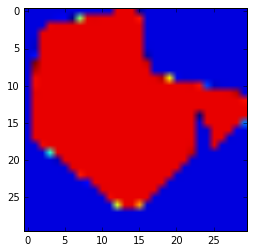

In [69]:
plt.show()

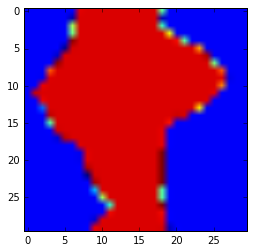

In [65]:
with open('../base_1.pkl','r') as f:
    base0=pickle.load(f)
c=np.reshape(base0[0,:],(30,30))
plt.imshow(c)
plt.show()

In [53]:
np.max(shape1)

1.8446744e+19

In [57]:
shape1.dtype

dtype('float32')

In [60]:
n=np.array([1,-1],dtype='uint64')

In [43]:
from roi_data_layer.minibatch import get_minibatch 
cfg.TRAIN.BATCH_SIZE =196
a=get_minibatch(roidb, 21)

4
[0 1 2 3]
1
5
[0 1 2 3 4]
1
0
[]
0
2
[0 1]
1
6
[0 1 2 3 4 5]
1
3
[0 1 2]
1
2
[0 1]
1
3
[0 1 2]
1
3
[0 1 2]
1
2
[0 1]
1
1
[0]
1
4
[0 1 2 3]
1
1
[0]
1
3
[0 1 2]
1
3
[0 1 2]
1
2
[0 1]
1
2
[0 1]
1
1
[0]
1
5
[0 1 2 3 4]
1
2
[0 1]
1
2
[0 1]
1
5
[0 1 2 3 4]
1
2
[0 1]
1
1
[0]
1
7
[0 1 2 3 4 5 6]
1
4
[0 1 2 3]
1
15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
1

/home/zehuany/cosegmentor/tools/../lib/roi_data_layer/minibatch.py:182: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  bg_inds = np.where((overlaps < cfg.TRAIN.BG_THRESH_HI) &
/home/zehuany/cosegmentor/tools/../lib/roi_data_layer/minibatch.py:202: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rois = rois[keep_inds]
/home/zehuany/cosegmentor/tools/../lib/roi_data_layer/minibatch.py:203: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # print rois[keep_inds[:fg_rois_per_this_image]],'\n'
/home/zehuany/cosegmentor/tools/../lib/roi_data_layer/minibatch.py:211: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  def _get_mask_targets(polygons):



5
[0 1 2 3 4]
1
0
[]
0
1
[0]
1
1
[0]
1
19
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
1
4
[0 1 2 3]
1
7
[0 1 2 3 4 5 6]
1
6
[0 1 2 3 4 5]
1
5
[0 1 2 3 4]
1
3
[0 1 2]
1
1
[0]
1
8
[0 1 2 3 4 5 6 7]
1
1
[0]
1
1
[0]
1
0
[]
0
5
[0 1 2 3 4]
1
1
[0]
1
3
[0 1 2]
1
2
[0 1]
1
1
[0]
1
3
[0 1 2]
1
8
[0 1 2 3 4 5 6 7]
1
4
[0 1 2 3]
1
5
[0 1 2 3 4]
1
0
[]
0
2
[0 1]
1
6
[0 1 2 3 4 5]
1
3
[0 1 2]
1
2
[0 1]
1
3
[0 1 2]
1
3
[0 1 2]
1
2
[0 1]
1
1
[0]
1
4
[0 1 2 3]
1
1
[0]
1
3
[0 1 2]
1
3
[0 1 2]
1
2
[0 1]
1
2
[0 1]
1
1
[0]
1
5
[0 1 2 3 4]
1
2
[0 1]
1
2
[0 1]
1
5
[0 1 2 3 4]
1
2
[0 1]
1
1
[0]
1
7
[0 1 2 3 4 5 6]
1
4
[0 1 2 3]
1
15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
1
5
[0 1 2 3 4]
1
0
[]
0
1
[0]
1
1
[0]
1
19
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
1
4
[0 1 2 3]
1
7
[0 1 2 3 4 5 6]
1
6
[0 1 2 3 4 5]
1
5
[0 1 2 3 4]
1
3
[0 1 2]
1
1
[0]
1
8
[0 1 2 3 4 5 6 7]
1
1
[0]
1
1
[0]
1
0
[]
0
5
[0 1 2 3 4]
1
1
[0]
1
3
[0 1 2]
1
2
[0 1]
1
1
[0]
1
3
[0 1 2]
1
8
[0 1 2 3 4 5 6 

In [50]:
roidb[2]['boxes'].shape

(1095, 4)